# Рубежный контроль №1

## Группа ИУ5Ц-82Б
## Свинцов Артемий

## Вариант № 28

## Тема: Технологии разведочного анализа и обработки данных.

## Задание
Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков?

## Текстовое описание набора данных

Для работы предложен набор данных, содержащий информацию о сердечных заболеваниях за 1988 год и состоит из 4 баз данных: Кливленд, Венгрия, Швейцария и Лонг-Бич V. 

Набор содержит следующие колонки:
- age - возраст в годах
- sex - пол (1 = мужчина, 0 = женщина)
- cp - тип боли в груди
- trestbps - артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)
- chol - уровень холестерина в сыворотке крови, мг/дл
- fbs - (уровень сахара в крови натощак > 120 мг/дл) (1 = правда; 0 = ложь)
- rectecg - результаты электрокардиографии в состоянии покоя
- thalach - достигнута максимальная частота сердечных сокращений
- exang - стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
- oldpeak - Депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом
- slope - наклон сегмента ST пикового упражнения
- ca - количество крупных сосудов (0-3), окрашенных флуороскопией
- thal - 1 = нормальный; 2 = исправленный дефект; 3 = обратимый дефект
- target - 1 или 0

# Импорт библиотек

Импортируем билиотеки с помощью команды import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузим набор данных с помощью библиотеки Pandas

In [3]:
df = pd.read_csv('heart.csv')

# Основные характеристики датасета

In [4]:
#вывод первых 5 строк
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#Определение размера датасета
df.shape

(1025, 14)

Размер датасета 1025 строк и 14 столбцов

In [6]:
#Список колонок
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
#Список колонок и тип данных
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
cp - 0
trestbps - 0
chol - 0
fbs - 0
restecg - 0
thalach - 0
exang - 0
oldpeak - 0
slope - 0
ca - 0
thal - 0
target - 0


При проверке пустых значений не выявлено

In [13]:
# Основные статистические характеристки набора данных
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Вывод: проведен первчиный анализ исходного набора данных. Определен размер датасета, список колонок и их тип данных, а также проведена проверка на пустые значения, выведены основные статистические характеристики датасета.

# Исследование датасета

### Информация о корреляции признаков

In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


Проверка корреляции признаков позволяет решить две задачи:

1) Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
2) Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

<AxesSubplot: >

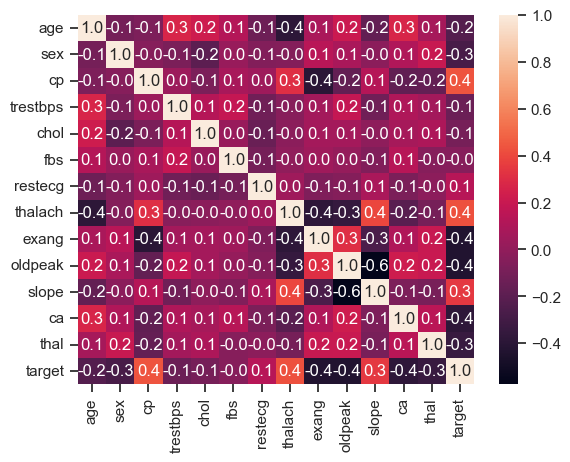

In [15]:
# Вывод значений в ячейках
sns.heatmap(df.corr(), annot=True, fmt='.1f')

Тепловая карта позволяет более наглядно увидеть корреляционные признаки

### Диаграмма рассеивания

<AxesSubplot: xlabel='thalach', ylabel='cp'>

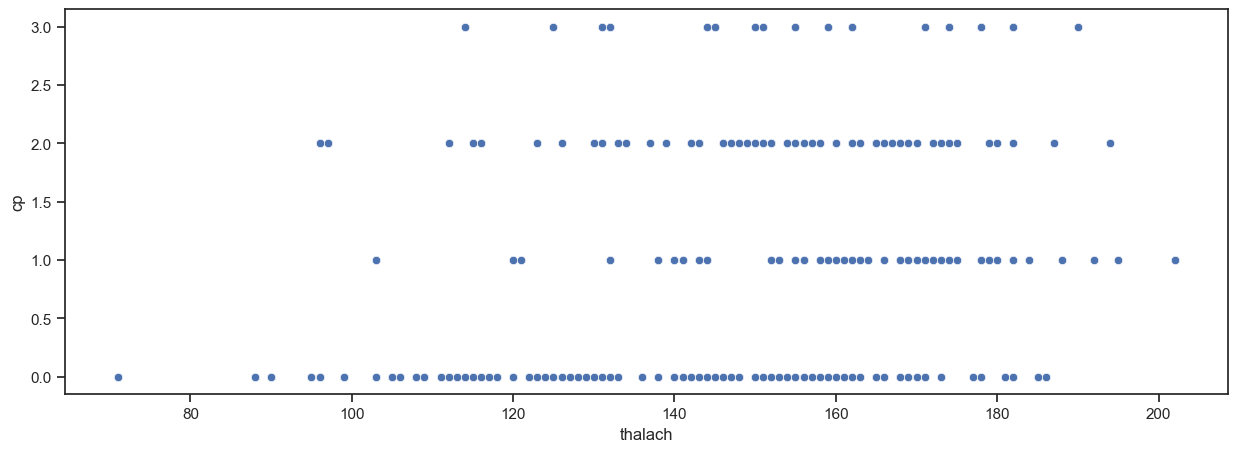

In [16]:
 fig, ax = plt.subplots(figsize=(15,5)) 
sns.scatterplot(ax=ax, x='thalach', y='cp', data=df)

Диаграмма рассеивания отражает распределение значений на большом промежутке данных. В данном примере мы видим распределение артериального давления взависимости от типа боли в груди.

<AxesSubplot: xlabel='thalach', ylabel='cp'>

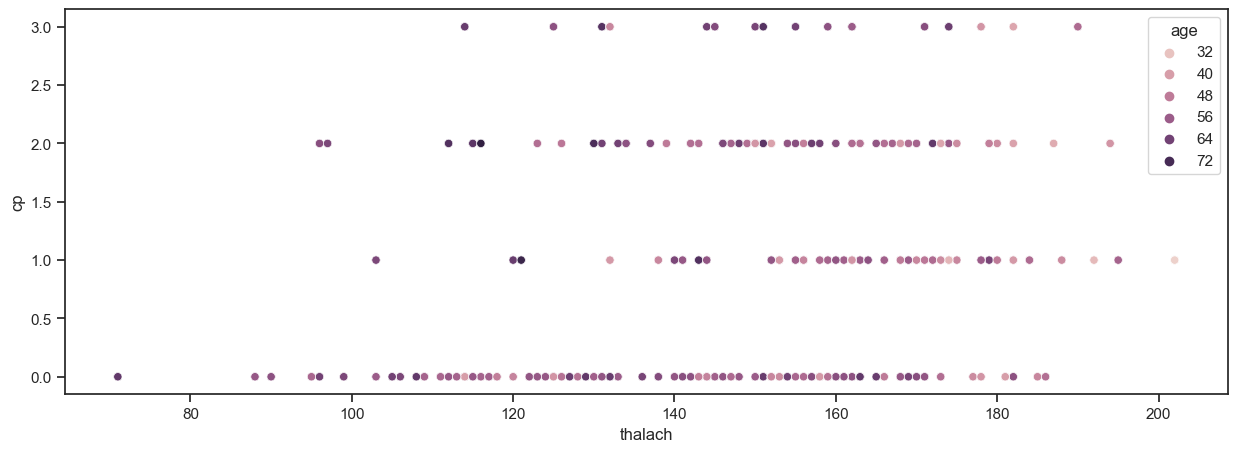

In [17]:
fig, ax = plt.subplots(figsize=(15,5)) 
sns.scatterplot(ax=ax, x='thalach', y='cp', data=df, hue='age')

Данная диаграмма рассеивания аналогична предыдущей, но здесь дополнительно указано распределение по возрасту.

<AxesSubplot: xlabel='age', ylabel='thalach'>

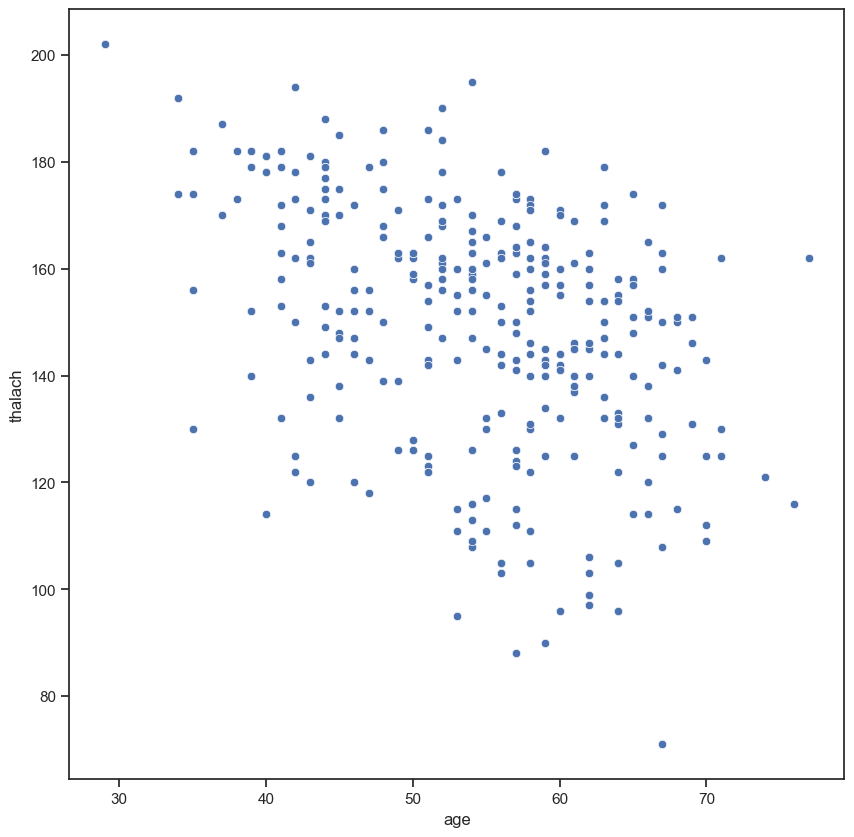

In [40]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='age', y='thalach', data=df)

Диаграмма рассеивания отражает распределение частоты сердечных сокращений взависимости от возраста

### Гистограмма

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10436\3006146283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

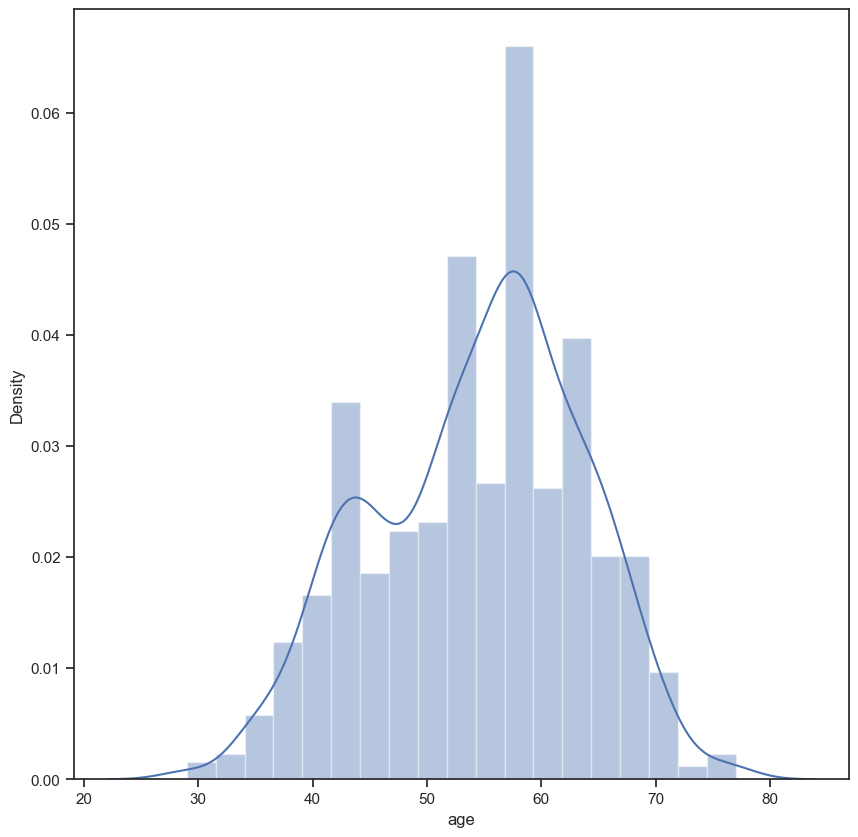

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(df['age'])

Данная гистограмма отражает распределение ворастов среди зарегистрированных больных. Можно сделать вывод что наибольше число больных фиксировано в возрасте 55 лет.

In [19]:
max_age = df['age'].max()
min_age = df['age'].min()
print ('Максимальный возраст: {}'.format(max_age))
print ('Минимальный возраст: {}'.format(min_age))

Максимальный возраст: 77
Минимальный возраст: 29


С помощью функций библиотеки Pandas определили максимальный и минимальный возраст среди больных.

### Парные диаграммы
Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

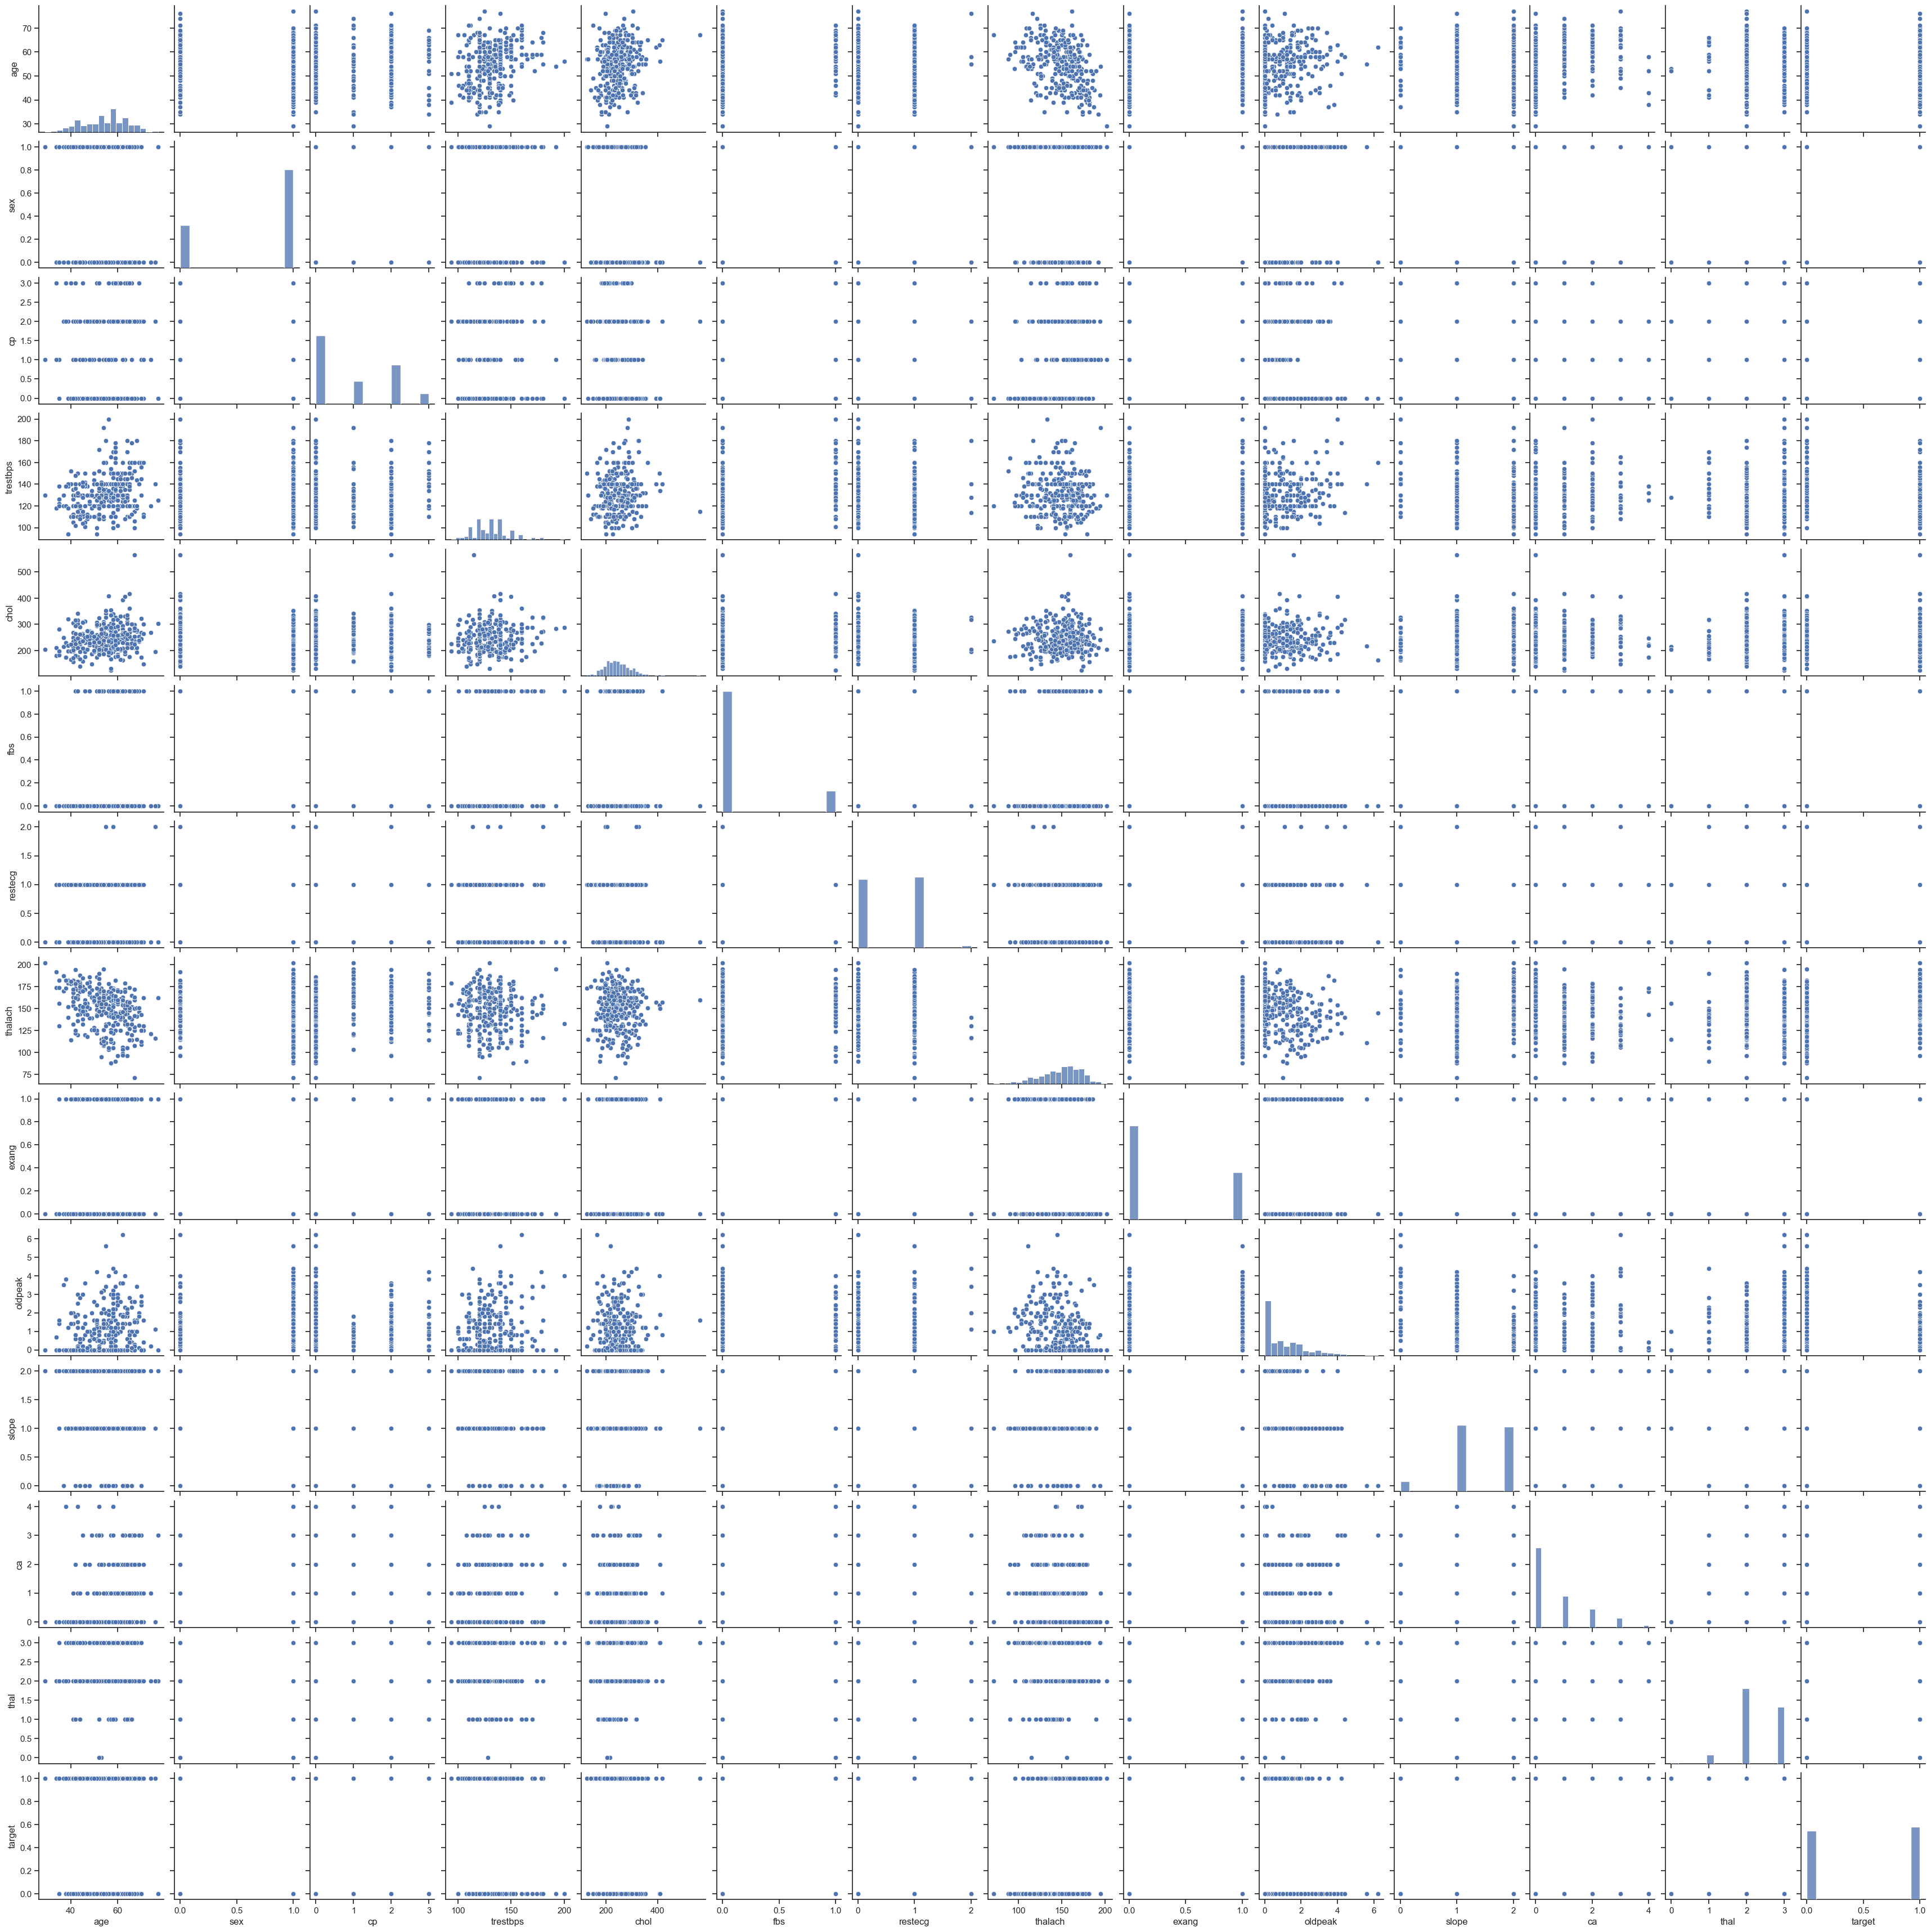

In [20]:
sns.pairplot(df)

### Ящик с усами
Отображает одномерное распределение

<AxesSubplot: xlabel='age'>

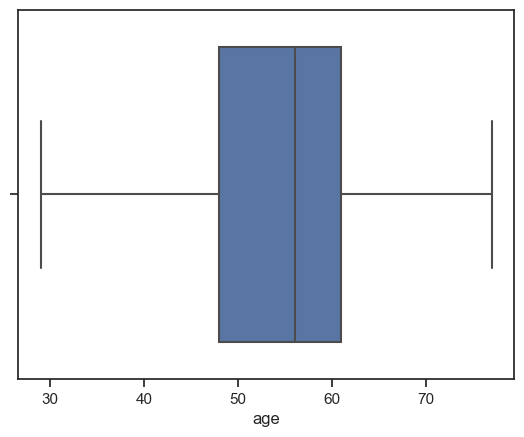

In [21]:
sns.boxplot(x=df['age'])

Отражает одномерное распределение возраста

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

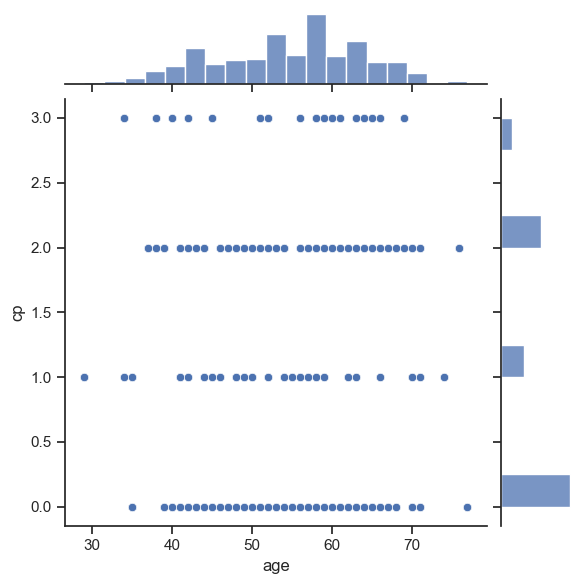

In [23]:
sns.jointplot(x='age', y='cp', data=df)

Отражает распределение возраста и типа боли в груди

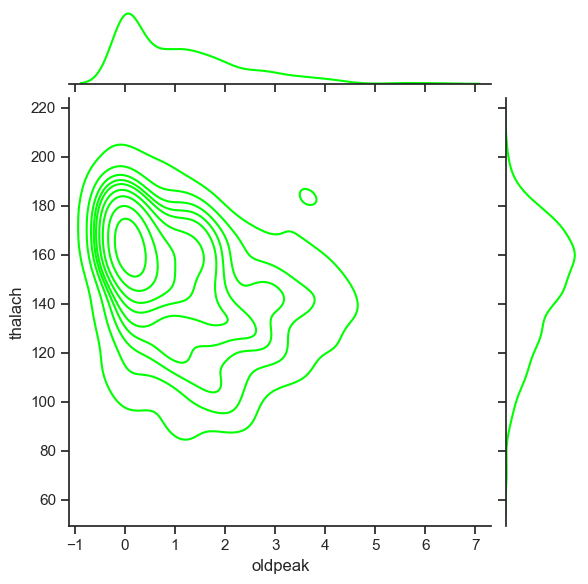

In [27]:
sns.jointplot(x='oldpeak', y='thalach', data=df, kind="kde", color='lime')

Отражает зависимость между частотой сердечных сокращений и Депрессией ST, вызванной физической нагрузкой по сравнению с отдыхом

### Violin plot
Оценка плотности ядра

<AxesSubplot: xlabel='thalach'>

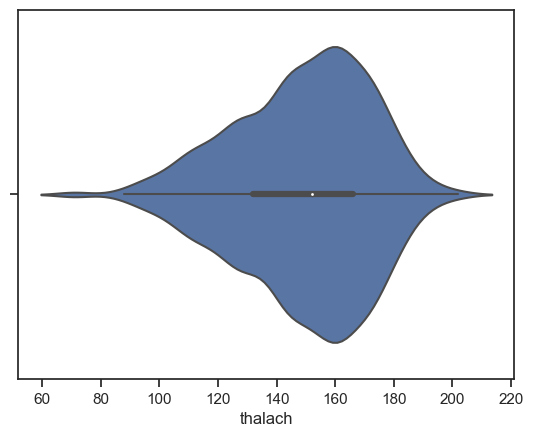

In [42]:
sns.violinplot(x=df['thalach'])

<AxesSubplot: xlabel='thal', ylabel='trestbps'>

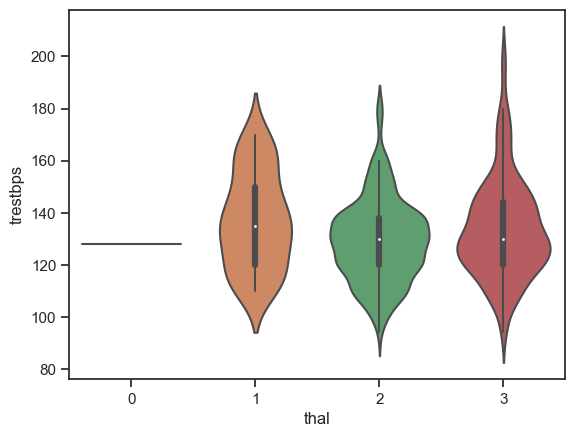

In [50]:
# Распределение параметра trestbps сгруппированные по thal.
sns.violinplot(x='thal', y='trestbps', data=df)

Отражает распределение плотности артериального давления

### Гистограммы

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10436\945388970.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], color='red')


<AxesSubplot: xlabel='chol', ylabel='Density'>

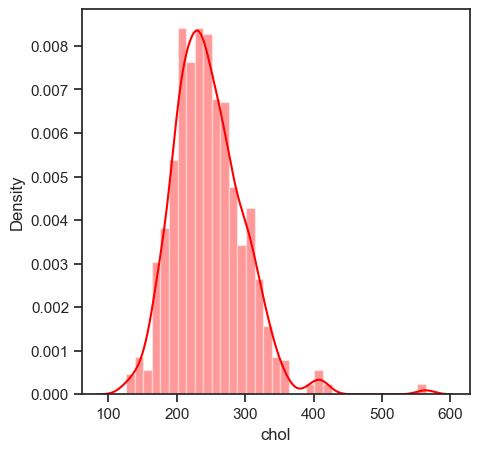

In [38]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(df['chol'], color='red')

Гистограмма отражает распределение уровня холестрина у больных

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10436\3698421963.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sex'], color='pink')


<AxesSubplot: xlabel='sex', ylabel='Density'>

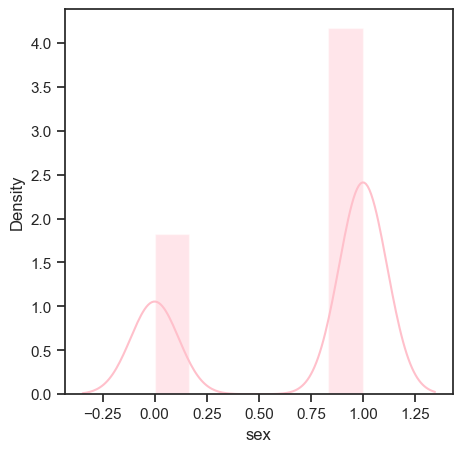

In [37]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(df['sex'], color='pink')

Отражает плотность распределение мужчин и женщин среди больных

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10436\2615890312.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thal'], color='blue')


<AxesSubplot: xlabel='thal', ylabel='Density'>

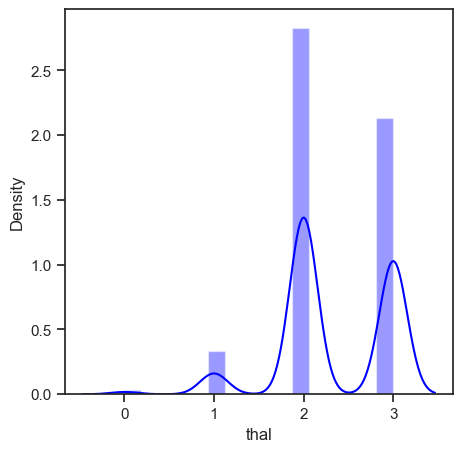

In [35]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(df['thal'], color='blue')

Гистограмма отражает плотность распределения степени заболевания

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10436\1742458795.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['slope'], color='black')


<AxesSubplot: xlabel='slope', ylabel='Density'>

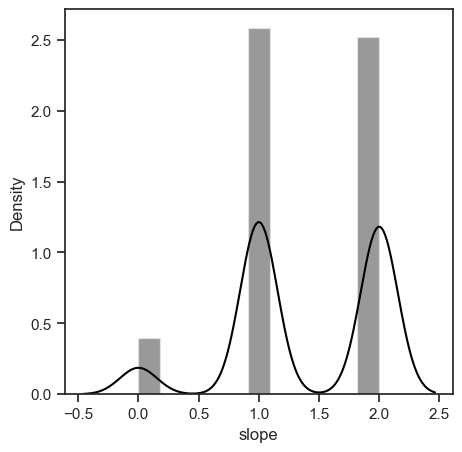

In [39]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(df['slope'], color='black')

In [ ]:
Гистограмма отражает плотность распределения наклона сегмента ST пикового упражнения

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10436\1703366223.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'], color='green')


<AxesSubplot: xlabel='trestbps', ylabel='Density'>

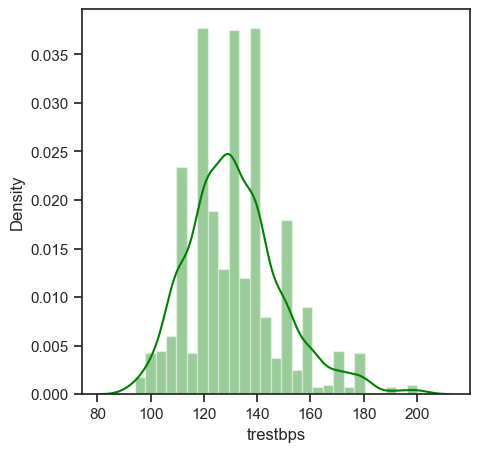

In [52]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(df['trestbps'], color='green')

Гистограмма отражает плотность распределения артериального давления

# Вывод

При выполнении работы закреплены навыки, полученные на лабораторныз работах. Проведен разведовочный анализ данных по предложенному датасету. Построены матрица корреляции и несколько графиков. Также по варианту построено несколько диаграмм по признакам исходного набора данных.